# 第3章: 正規表現

Wikipediaの記事を以下のフォーマットで書き出したファイルjawiki-country.json.gzがある．

1行に1記事の情報がJSON形式で格納される
各行には記事名が”title”キーに，記事本文が”text”キーの辞書オブジェクトに格納され，そのオブジェクトがJSON形式で書き出される
ファイル全体はgzipで圧縮される
以下の処理を行うプログラムを作成せよ．

In [1]:
!wget https://nlp100.github.io/data/jawiki-country.json.gz

--2020-04-14 08:16:21--  https://nlp100.github.io/data/jawiki-country.json.gz
nlp100.github.io (nlp100.github.io) をDNSに問いあわせています... 185.199.109.153, 185.199.108.153, 185.199.110.153, ...
nlp100.github.io (nlp100.github.io)|185.199.109.153|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 5068362 (4.8M) [application/gzip]
`jawiki-country.json.gz' に保存中

jawiki-country.json 100%[===================>]   4.83M  2.93MB/s 時間 1.7s     

2020-04-14 08:16:24 (2.93 MB/s) - `jawiki-country.json.gz' へ保存完了 [5068362/5068362]



## 20. JSONデータの読み込み
Wikipedia記事のJSONファイルを読み込み，「イギリス」に関する記事本文を表示せよ．問題21-29では，ここで抽出した記事本文に対して実行せよ．

In [36]:
import gzip, json, re
with gzip.open('jawiki-country.json.gz', 'rt') as f:
    data = f.read()
uk = [json.loads(line) for line in data.split('\n') if len(line) > 1 and json.loads(line)['title'] == 'イギリス'][0]

## 21. カテゴリ名を含む行を抽出
記事中でカテゴリ名を宣言している行を抽出せよ．

In [52]:
# [[Category:欧州連合加盟国|元]] これのこと？
pattern = '\[\[Category.*'
matches = [line for line in uk['text'].split('\n') if re.match(pattern, line)]
matches

['[[Category:イギリス|*]]',
 '[[Category:イギリス連邦加盟国]]',
 '[[Category:英連邦王国|*]]',
 '[[Category:G8加盟国]]',
 '[[Category:欧州連合加盟国|元]]',
 '[[Category:海洋国家]]',
 '[[Category:現存する君主国]]',
 '[[Category:島国]]',
 '[[Category:1801年に成立した国家・領域]]']

## 22. カテゴリ名の抽出
記事のカテゴリ名を（行単位ではなく名前で）抽出せよ．

In [100]:
[re.search('\[\[Category:(.+?)(\|.*)?\]\]', line).groups()[0] for line in matches]

['イギリス',
 'イギリス連邦加盟国',
 '英連邦王国',
 'G8加盟国',
 '欧州連合加盟国',
 '海洋国家',
 '現存する君主国',
 '島国',
 '1801年に成立した国家・領域']

## 23. セクション構造
記事中に含まれるセクション名とそのレベル（例えば”== セクション名 ==”なら1）を表示せよ．

In [101]:
['{} is level {}.'.format(re.search('(=+)(.*?)=+', line).groups()[1], len(re.search('(=+)(.*?)=+', line).groups()[0])) for line in uk['text'].split('\n') if re.match('=[1,]?.*?=[1,]?', line)]

['国名 is level 2.',
 '歴史 is level 2.',
 '地理 is level 2.',
 '主要都市 is level 3.',
 '気候 is level 3.',
 '政治 is level 2.',
 '元首 is level 3.',
 '法 is level 3.',
 '内政 is level 3.',
 '地方行政区分 is level 3.',
 '外交・軍事 is level 3.',
 '経済 is level 2.',
 '鉱業 is level 3.',
 '農業 is level 3.',
 '貿易 is level 3.',
 '不動産 is level 3.',
 'エネルギー政策 is level 3.',
 '通貨 is level 3.',
 '企業 is level 3.',
 '通信 is level 4.',
 '交通 is level 2.',
 '道路 is level 3.',
 '鉄道 is level 3.',
 '海運 is level 3.',
 '航空 is level 3.',
 '科学技術 is level 2.',
 '国民 is level 2.',
 '言語 is level 3.',
 '宗教 is level 3.',
 '婚姻 is level 3.',
 '移住 is level 3.',
 '教育 is level 3.',
 '医療 is level 3.',
 '文化 is level 2.',
 '食文化 is level 3.',
 '文学 is level 3.',
 '哲学 is level 3.',
 '音楽 is level 3.',
 'ポピュラー音楽 is level 4.',
 '映画 is level 3.',
 'コメディ is level 3.',
 '国花 is level 3.',
 '世界遺産 is level 3.',
 '祝祭日 is level 3.',
 'スポーツ is level 3.',
 'サッカー is level 4.',
 'クリケット is level 4.',
 '競馬 is level 4.',
 'モータースポーツ is level 4.',
 '野球 is level 4.',
 ' カーリング  

# 24. ファイル参照の抽出
記事から参照されているメディアファイルをすべて抜き出せ．

In [132]:
[re.search('\[\[ファイル:(.*?)\|', line).groups() for line in uk['text'].split('\n') if re.match('\[\[ファイル.*', line)]

[('Descriptio Prime Tabulae Europae.jpg',),
 ("Lenepveu, Jeanne d'Arc au siège d'Orléans.jpg",),
 ('London.bankofengland.arp.jpg',),
 ('Battle of Waterloo 1815.PNG',),
 ('Uk topo en.jpg',),
 ('BenNevis2005.jpg',),
 ('Population density UK 2011 census.png',),
 ('2019 Greenwich Peninsula & Canary Wharf.jpg',),
 ('Leeds CBD at night.jpg',),
 ('Palace of Westminster, London - Feb 2007.jpg',),
 ('Scotland Parliament Holyrood.jpg',),
 ('Donald Trump and Theresa May (33998675310) (cropped).jpg',),
 ('Soldiers Trooping the Colour, 16th June 2007.jpg',),
 ('City of London skyline from London City Hall - Oct 2008.jpg',),
 ('Oil platform in the North SeaPros.jpg',),
 ('Eurostar at St Pancras Jan 2008.jpg',),
 ('Heathrow Terminal 5C Iwelumo-1.jpg',),
 ('UKpop.svg',),
 ('Anglospeak.svg',),
 ("Royal Aberdeen Children's Hospital.jpg",),
 ('CHANDOS3.jpg',),
 ('The Fabs.JPG',),
 ('Wembley Stadium, illuminated.jpg',)]

## 25. テンプレートの抽出
記事中に含まれる「基礎情報」テンプレートのフィールド名と値を抽出し，辞書オブジェクトとして格納せよ．

In [202]:
dist = {i[0]: i[1].strip() for i in re.findall('\|(.*?) +=(.*?)\n', re.findall('^\{\{基礎情報(.*?)\}\}$', uk['text'], re.MULTILINE + re.DOTALL)[0])}
dist

{'公式国名': '{{lang|en|United Kingdom of Great Britain and Northern Ireland}}<ref>英語以外での正式国名:<br />',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章リンク': '（[[イギリスの国章|国章]]）',
 '国章画像': '[[ファイル:Royal Coat of Arms of the United Kingdom.svg|85px|イギリスの国章]]',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '標語': '{{lang|fr|[[Dieu et mon droit]]}}<br />（[[フランス語]]:[[Dieu et mon droit|神と我が権利]]）',
 '略名': 'イギリス'}

## 26. 強調マークアップの除去
25の処理時に，テンプレートの値からMediaWikiの強調マークアップ（弱い強調，強調，強い強調のすべて）を除去してテキストに変換せよ（参考: マークアップ早見表）

In [211]:
{k: re.sub('{{|<.*?>|}}|\||\[\[|\]\]', ' ', v) for k, v in dist.items()}

{'公式国名': ' lang en United Kingdom of Great Britain and Northern Ireland  英語以外での正式国名: ',
 '国旗画像': 'Flag of the United Kingdom.svg',
 '国章リンク': '（ イギリスの国章 国章 ）',
 '国章画像': ' ファイル:Royal Coat of Arms of the United Kingdom.svg 85px イギリスの国章 ',
 '日本語国名': 'グレートブリテン及び北アイルランド連合王国',
 '標語': ' lang fr  Dieu et mon droit   （ フランス語 : Dieu et mon droit 神と我が権利 ）',
 '略名': 'イギリス'}

## 27. 内部リンクの除去
26の処理に加えて，テンプレートの値からMediaWikiの内部リンクマークアップを除去し，テキストに変換せよ（参考: マークアップ早見表）．

26 でマークアップすべて消したのでスキップ

## 28. MediaWikiマークアップの除去
27の処理に加えて，テンプレートの値からMediaWikiマークアップを可能な限り除去し，国の基本情報を整形せよ．

## 29. 国旗画像のURLを取得する
テンプレートの内容を利用し，国旗画像のURLを取得せよ．（ヒント: MediaWiki APIのimageinfoを呼び出して，ファイル参照をURLに変換すればよい）

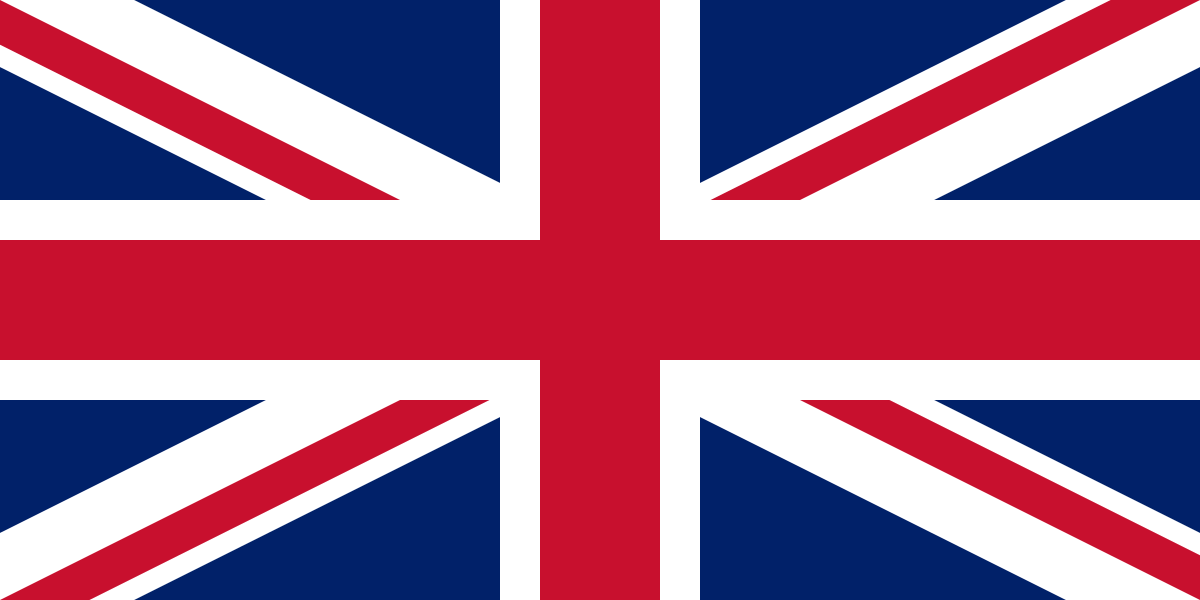

In [231]:
import urllib.parse
import urllib.request
from IPython.display import SVG
params = {
    'format': 'json',
    'action': 'query',
    'titles': "File:{}".format(dist['国旗画像']),
    'prop': 'imageinfo',
    'iiprop': 'url'
}
query = urllib.parse.urlencode(params)
url = 'http://en.wikipedia.org/w/api.php?{}'.format(query)
request = urllib.request.urlopen(url)
response = request.read().decode('utf-8')
SVG(re.findall('(https?\:\/\/.*?.svg)', response)[0])